# Housing MEDV Prediction

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

Importing Dataset

In [2]:
names = ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV')
df = pd.read_csv('housing.csv', names = names)

Exploratory Data Analysis

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

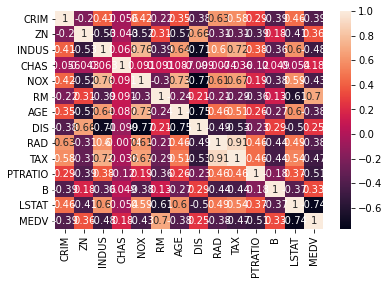

In [6]:
# plt.figsize(10, 9)
sns.heatmap(df.corr(), annot = True)

Regression

In [8]:
y = df.MEDV
x = df.drop(['MEDV', 'CHAS'], axis =  1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 176)

In [9]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(404, 12) (102, 12) (404,) (102,)


In [10]:
models = {'LinearRegression' : make_pipeline(StandardScaler(), LinearRegression()),
    'Lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'Ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'ElasticNet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'RandomForest' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'GradientBoosting' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))}


In [11]:
models

{'LinearRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression())]),
 'Lasso': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('lasso', Lasso(random_state=123))]),
 'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(random_state=123))]),
 'ElasticNet': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('elasticnet', ElasticNet(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor',
                  RandomForestRegressor(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingregressor',
                  GradientBoostingRegressor(random_state=123))])}

In [12]:
models_fit = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    models_fit[name] = model
    print(f'{name}')

LinearRegression
Lasso
Ridge
ElasticNet
RandomForest
GradientBoosting


In [13]:
models_fit

{'LinearRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression())]),
 'Lasso': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('lasso', Lasso(random_state=123))]),
 'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(random_state=123))]),
 'ElasticNet': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('elasticnet', ElasticNet(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor',
                  RandomForestRegressor(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingregressor',
                  GradientBoostingRegressor(random_state=123))])}

In [14]:
for name, model in models_fit.items():
    ypred = model.predict(xtest)
    print(f'{name:}')
    print(f'{r2_score(ytest, ypred)}')
    print(f'{mae(ytest, ypred)}')

LinearRegression
0.6583755092082102
3.577850669975935
Lasso
0.5897617392722275
4.013275993476741
Ridge
0.6574762651213798
3.5799076448368754
ElasticNet
0.5459973725749289
4.227822282697634
RandomForest
0.8980082468899409
2.078539215686273
GradientBoosting
0.9204719004020736
1.938776486908453


HyperParameter Tuning

In [19]:
model = LinearRegression(fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=1, positive=False)

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
print(f'{r2_score(ytest, ypred)}')
print(f'{mae(ytest, ypred)}')

0.65837550920821
3.577850669975933


In [20]:
model.coef_

array([-1.03235969e-01,  3.84707665e-02,  1.46016906e-02, -1.37757258e+01,
        4.08393901e+00, -1.25264533e-02, -1.40471342e+00,  2.76862829e-01,
       -1.35623284e-02, -9.85124424e-01,  1.14601334e-02, -4.65589649e-01])

In [21]:
ypred

array([23.88316028, 16.30733537, 15.14402677, 19.45170096, 39.42157605,
       19.50014921, 35.1094789 , 23.42548449, 25.34760516, 18.96167173,
       31.31829487, 13.59205246, 13.33825895,  8.37892959, 31.16684481,
       18.29764384, 20.2933112 , 23.53883971, 25.77530922, 37.83063273,
       27.5405391 , 13.25198554, 17.23676761, 18.40077772, 33.70485908,
       25.10578596, 15.94431224,  0.89729931, 33.06562814, 24.67131853,
       28.88796952, 14.87677513, 13.97321992, 30.37674881, 25.06302133,
       23.34465957, 15.24298272, 17.64131144, 24.82996592, 16.98633729,
        9.28311906, 21.01908816,  9.88994733, 19.33925042, 17.8850822 ,
       16.39890608, 33.12068524, 26.71634061, 33.12957051, 20.05813243,
       21.24888286, 27.77740314, 17.07340929, 19.76414848, 29.08992214,
       28.58498832, 22.0310007 , 34.19255481, 18.5472175 , 32.34702967,
       33.08192336, 21.90841929, 15.9063745 , 24.32065494,  6.11485134,
        5.19510707, 29.2164627 , 37.33194348, 22.35137812, 26.04

In [22]:
np.array(ytest)

array([18.9, 15.4, 11.7, 19.6, 50. , 18.9, 39.8, 20.8, 19.4, 27.9, 35.4,
       13.6, 19. ,  5. , 28.7, 15.3, 16.1, 21.2, 24.2, 50. , 22. , 13.4,
       17.5, 19.5, 32. , 23.1, 15.6, 17.9, 33.2, 23.4, 22.8, 19.3, 11.5,
       30.5, 18.5, 19.4, 14.1, 20.8, 22.6, 14.9,  7.2, 19.3,  9.7, 18.2,
       13.9, 14.3, 33.1, 22.3, 28.5, 17.7, 20. , 25.2, 13. , 15. , 23.6,
       28. , 50. , 37.3, 16.6, 31.6, 41.3, 21.2, 17.2, 22.2,  7.4,  8.4,
       25. , 44. , 50. , 22.2, 23.3, 12. , 20.4, 25. , 10.4, 21.4, 24.1,
       18. , 29.6, 28.4, 13.4, 21.6, 31.2, 11.3,  7.2, 18.4, 24.5, 26.6,
       21.4, 24.7, 22.1,  8.7, 13.1, 14.9, 17.4, 27.5, 23.1, 20.3, 15.2,
       50. , 23.2, 11.8])

More Model(s) With Randomized Search

In [23]:
from sklearn.model_selection import RandomizedSearchCV as RS

In [29]:
rf_hyperparameters = {
    'n_estimators' : [5, 15, 20, 50, 100, 110, 120, 130, 140, 150, 160, 200],
    'max_features' : ['auto', 'sqrt', 0.5, 0.33, 0.2], 
    'max_depth' : [5, 10, 20, 30, 40, 50,60, 70, 100, 125, 200]
}

In [38]:
model1 = RandomForestRegressor()
model1 = RS(model1, rf_hyperparameters, n_jobs = -1)
model1.fit(xtrain, ytrain)
model1.best_params_
ypred1 = model1.predict(xtest)
print(f'{r2_score(ytest, ypred1)}')
print(f'{mae(ytest, ypred1)}')

0.8735527136438792
2.1676960784313715


In [39]:
model1.best_params_
print(model1.best_params_)

{'n_estimators': 120, 'max_features': 0.5, 'max_depth': 20}


In [27]:
print(ypred1)

[21.32533333 16.522      13.78333333 20.11133333 44.692      19.98
 37.346      21.77333333 21.09133333 20.28866667 33.054      14.692
 16.01666667  8.86733333 28.88       20.61533333 19.20466667 20.90933333
 24.19066667 45.03866667 23.92866667 12.58       18.24066667 18.75266667
 33.04866667 23.92866667 16.60533333 12.63266667 32.146      21.426
 26.28333333 20.29466667 11.23266667 30.20266667 21.598      19.53066667
 15.704      21.65133333 23.448      16.17733333  9.02933333 20.234
 11.08533333 19.85066667 13.27266667 16.22933333 31.388      22.53066667
 31.128      19.082      19.96133333 24.92466667 14.988      22.24733333
 24.11266667 26.678      35.78       34.34266667 19.81933333 31.048
 33.80066667 21.856      14.384      22.20266667  9.908       9.78133333
 23.88666667 39.462      28.13       23.18933333 25.26333333 14.04733333
 19.2        26.42933333  8.52266667 19.86333333 24.078      16.94066667
 27.068      28.07666667 13.73866667 23.30666667 29.65266667 12.946
  9.94266

In [28]:
print(np.array(ytest))

[18.9 15.4 11.7 19.6 50.  18.9 39.8 20.8 19.4 27.9 35.4 13.6 19.   5.
 28.7 15.3 16.1 21.2 24.2 50.  22.  13.4 17.5 19.5 32.  23.1 15.6 17.9
 33.2 23.4 22.8 19.3 11.5 30.5 18.5 19.4 14.1 20.8 22.6 14.9  7.2 19.3
  9.7 18.2 13.9 14.3 33.1 22.3 28.5 17.7 20.  25.2 13.  15.  23.6 28.
 50.  37.3 16.6 31.6 41.3 21.2 17.2 22.2  7.4  8.4 25.  44.  50.  22.2
 23.3 12.  20.4 25.  10.4 21.4 24.1 18.  29.6 28.4 13.4 21.6 31.2 11.3
  7.2 18.4 24.5 26.6 21.4 24.7 22.1  8.7 13.1 14.9 17.4 27.5 23.1 20.3
 15.2 50.  23.2 11.8]
